[0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
[0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0]
[1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1]
[0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 

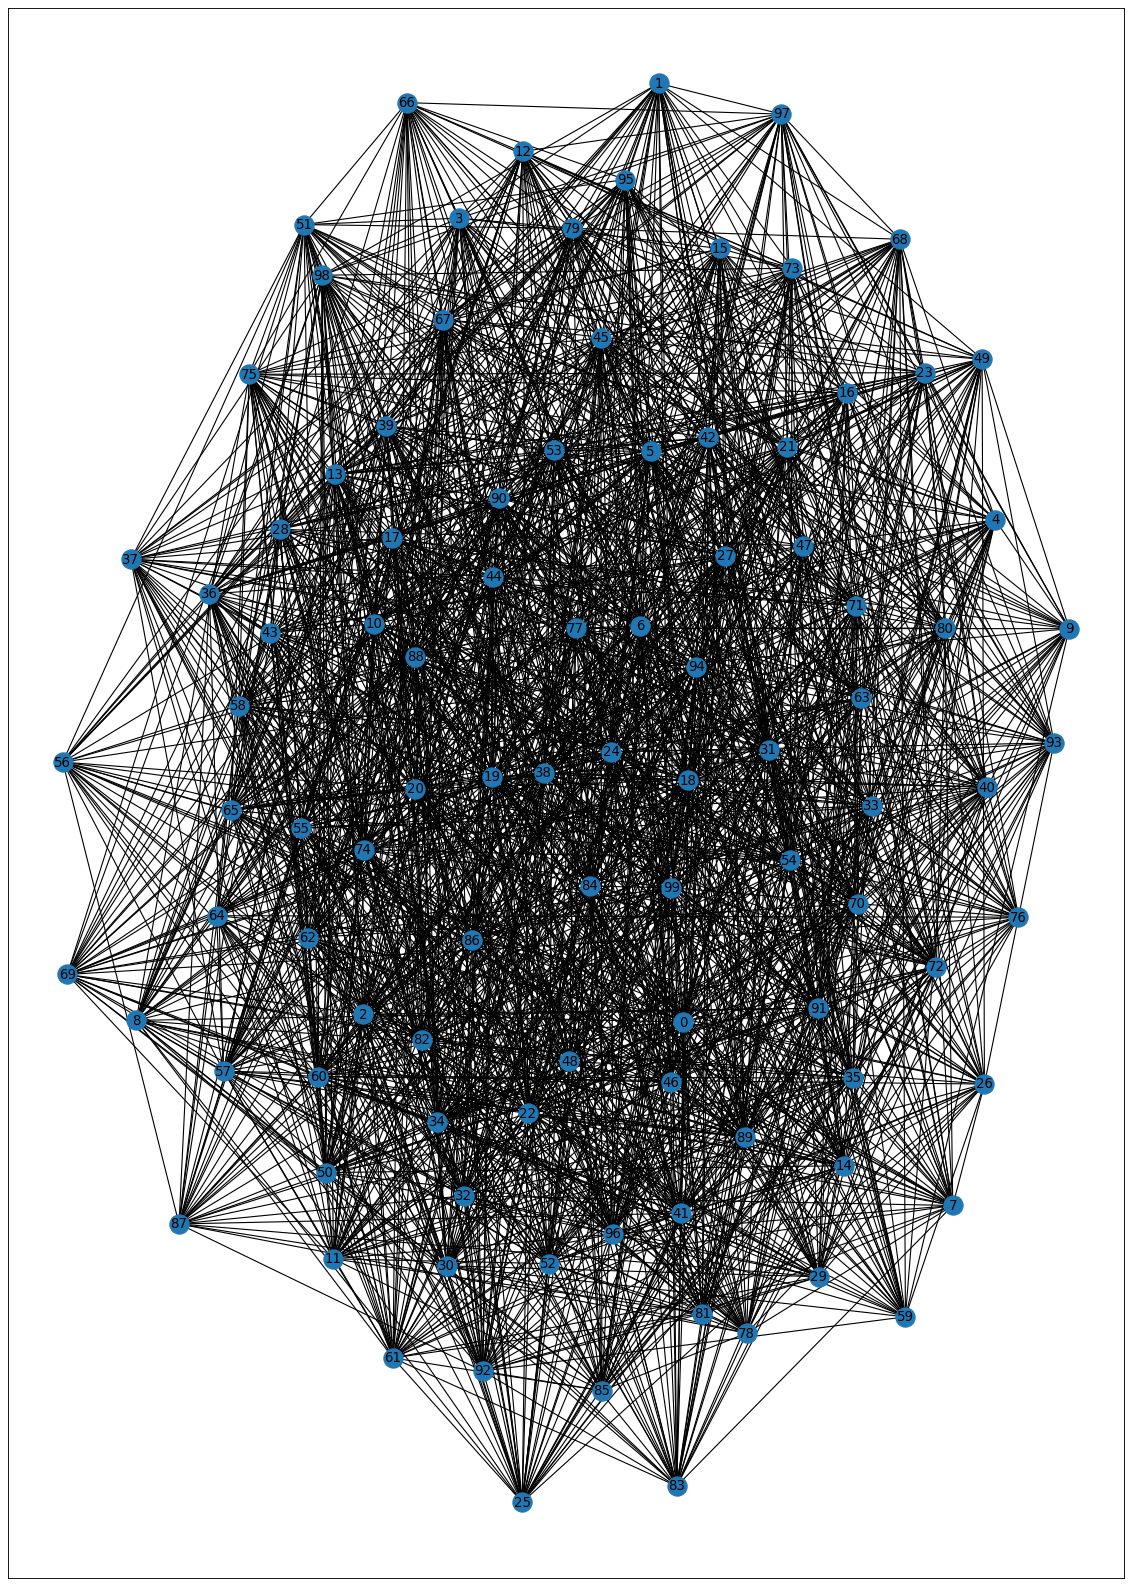

In [2]:
"""Algorithms. Task_5, Konstantin Bestuzhev, C4132"""
"""Algorithms on graphs. Introduction to basic algorithms on graphs."""


import random
import networkx as nx
import matplotlib.pyplot as plt

"""Graph parameters"""
vertices = 100
edges = 2000


"""Create random list with all significant adjacency matrix elements"""
def signifcant_elements(vertices, edges):
    if(edges > vertices*(vertices-1)//2):
        return None
    else:
        elements = [0 for i in range((vertices*(vertices-1)//2-edges))]
        elements+=[1 for j in range(edges)]
        random.shuffle(elements)
        return(elements)

"""Generate random adjacency matrix"""
def adjacency_matrix(vertices, edges):
    if(vertices == 0):
        return []
    else:
        matrix = [[0 for i in range(vertices)] for j in range(vertices)]
        elements = signifcant_elements(vertices, edges)
        curr_line = 0
        curr_row = 1
        for element in elements:    # Symmetrical fill of adjacency matrix
            matrix[curr_line][curr_row] = element
            matrix[curr_row][curr_line] = element
            if(curr_row < len(matrix)-1):
                curr_row+=1
            else:
                curr_line+=1
                curr_row = curr_line+1
    return matrix

"""Change adjacency matrix into adjacency list"""
def adjacency_list(adjacency_matrix):
    adjacency_list = {}
    adjacent_vertices = []
    for vertice in range(len(adjacency_matrix)):
        for element in range(len(adjacency_matrix[vertice])):
            if adjacency_matrix[vertice][element] == 1:
                adjacent_vertices.append(element)
        adjacency_list[vertice] = adjacent_vertices.copy()
        adjacent_vertices.clear()
    return adjacency_list 

"""Create graph based on adjacency list"""
def create_graph(adjacency_list):
    G = nx.Graph()
    G.add_nodes_from(adjacency_list.keys())
    for vertice in adjacency_list:
        for edge in adjacency_list[vertice]:
            G.add_edge(vertice, edge)
    return G

"""Depth-first search of components"""
""" Return list with the sequence of nodes in each connected component"""
def graph_DFS(graph_components):
    nodes_sequences = []
    for component in graph_components:
        sequence = nx.dfs_edges(random_g, node_)

"""Current graph sample"""
adj_matrix = adjacency_matrix(vertices, edges)
adj_list = adjacency_list(adj_matrix)
G = create_graph(adj_list)

"""Analisys of the graph"""
graph_components = nx.connected_components(G)
dfs_nod_sequence = nx.dfs_edges(G)    # Depth-first search of components   
bfs_nod_sequence = nx.bfs_edges(G, 0)    # Breadth-first search of path
    
"""Output the results"""
for i in adj_matrix:
    print(i)
for i in adj_list:
    print(i, adj_list[i])    
print(list(graph_components))
print(list(dfs_nod_sequence))
print(list(bfs_nod_sequence))
fig=plt.figure(figsize=(18, 26), dpi= 80, facecolor='w', edgecolor='k')
nx.draw_networkx(G)
plt.savefig('A:\Information\Kostya\Master\Graph.png')